In [ ]:
SEED = 0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-76-d5bdf0009959>", line 2, in <cell line: 2>
    get_ipython().run_line_magic('cd', '/content/gdrive/My Drive/Kaggle')
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/inte

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:00<00:00, 124MB/s]
100% 66.0M/66.0M [00:00<00:00, 131MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls

creditcard.csv	kaggle.json


In [ ]:
#Loading data
import pandas as pd
import numpy as np

data = pd.read_csv("/content/gdrive/My Drive/Kaggle/creditcard.csv", header=0)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))
data['Class'].unique()


Rows 284807, Columns 31


array([0, 1])

In [ ]:
data['Class'] = data['Class'].replace({0: '0', 1: '1'})
data['Class'].unique()
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Process Missing values
data = data.replace(' ?', np.nan)
for col in data.columns:
    print(col, data[col].isna().sum())
#No missing val

Time 0
V1 0
V2 0
V3 0
V4 0
V5 0
V6 0
V7 0
V8 0
V9 0
V10 0
V11 0
V12 0
V13 0
V14 0
V15 0
V16 0
V17 0
V18 0
V19 0
V20 0
V21 0
V22 0
V23 0
V24 0
V25 0
V26 0
V27 0
V28 0
Amount 0
Class 0


In [ ]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 0
Rows 283726, Columns 31


V2 and Amount = -0.533
Time and V3 = -0.422
V7 and Amount = 0.400
V5 and Amount = -0.388
V20 and Amount = 0.341
Time and V11 = -0.249
Time and V25 = -0.233
V1 and Amount = -0.230
V6 and Amount = 0.216
V3 and Amount = -0.212


In [ ]:
labels = data['Class'] 
data = data[data.columns[:-1]]
labels.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.3, random_state=SEED )

In [ ]:
#Feature reduction based on correlation
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [ ]:
def print_highly_correlated(df, features, threshold=0.25):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    if s_corr_list == []:
      print("There are no highly correlated features with correlation above", threshold)
    else:
      for v, i, j in s_corr_list:
        cols = df[features].columns
        print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
   
#print_highly_correlated(data,data.columns,0.1)
data_correlation_check = data.copy()
print(data_correlation_check.columns)
#print(data_correlation_check.sample(5))
print_highly_correlated(data_correlation_check,data_correlation_check.columns,0.2)
#print(data.columns)
#print(data.corr()["class"].sort_values())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
V2 and Amount = -0.531
Time and V3 = -0.420
V7 and Amount = 0.397
V5 and Amount = -0.386
V20 and Amount = 0.339
Time and V11 = -0.248
Time and V25 = -0.233
V1 and Amount = -0.228
V6 and Amount = 0.216
V3 and Amount = -0.211


Percentage of variance explained by PC 1: 0.06248961030196394
Percentage of variance explained by PC 2: 0.05589325842085472
Percentage of variance explained by PC 3: 0.05442921011062314
Percentage of variance explained by PC 4: 0.03453444204455118
Percentage of variance explained by PC 5: 0.03364895287570764
Percentage of variance explained by PC 6: 0.0332932986770373
Percentage of variance explained by PC 7: 0.03303545510405614
Percentage of variance explained by PC 8: 0.03284395757079021
Percentage of variance explained by PC 9: 0.03265922545183906
Percentage of variance explained by PC 10: 0.03264231790894313
Percentage of variance explained by PC 11: 0.03256083742645693
Percentage of variance explained by PC 12: 0.032451315293880977
Percentage of variance explained by PC 13: 0.03238627577014607
Percentage of variance explained by PC 14: 0.032363076476355536
Percentage of variance explained by PC 15: 0.03228628541449548
Total variance explained by 30 PCs: 0.5675175188477014


Text(0, 0.5, 'Fraction of variance')

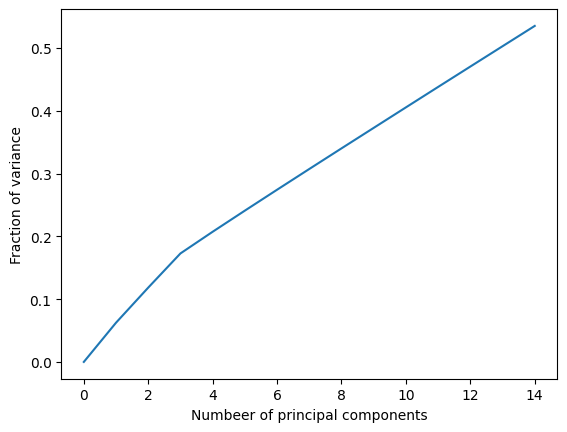

In [ ]:
#PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

n_components = 15
pca = PCA(n_components=n_components, random_state=SEED).fit(X_train)
for i in range(n_components):
    print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
print('Total variance explained by 30 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

val = [sum(pca.explained_variance_ratio_[:x])for x in range(len(pca.explained_variance_ratio_))]

plt.plot(val) 
plt.xlabel("Numbeer of principal components") 
plt.ylabel("Fraction of variance")

In [ ]:
pca = PCA(n_components=10, random_state=SEED).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
#Cost sensitive Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, recall_score, accuracy_score
import numpy as np

clf = DecisionTreeClassifier(criterion='entropy')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

scorer = make_scorer(recall_score, pos_label='1')

weight_range = np.logspace(0, 3, 10)
weight_range = np.append(weight_range, 577)
param_grid = {'criterion': ["gini", "entropy"], 'max_depth': [3, 5, 7] }

print(param_grid)


{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}


In [ ]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, scoring=scorer)
grid_result = grid_search.fit(X_train_pca, y_train)

Fitting 10 folds for each of 66 candidates, totalling 660 fits
[CV 1/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.882 total time=   1.6s
[CV 2/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.735 total time=   1.6s
[CV 3/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.735 total time=   1.5s
[CV 4/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.735 total time=   1.5s
[CV 5/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.771 total time=   2.1s
[CV 6/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.800 total time=   2.1s
[CV 7/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.686 total time=   1.7s
[CV 8/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.657 total time=   1.6s
[CV 9/10] END class_weight={0: 1, 1: 1.0}, criterion=gini, max_depth=3;, score=0.676 total time=   1.6s
[

In [ ]:
print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')

Best 0.860672268907563 using {'class_weight': {0: 1, 1: 1000.0}, 'criterion': 'gini', 'max_depth': 3}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.735546 (0.065272) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'gini', 'max_depth': 3}
0.764622 (0.068816) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'gini', 'max_depth': 5}
0.761765 (0.068925) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'gini', 'max_depth': 7}
0.727311 (0.070048) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'entropy', 'max_depth': 3}
0.759076 (0.063722) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'entropy', 'max_depth': 5}
0.761849 (0.066486) with: {'class_weight': {0: 1, 1: 1.0}, 'criterion': 'entropy', 'max_depth': 7}
0.779328 (0.059833) with: {'class_weight': {0: 1, 1: 2.154434690031884}, 'criterion': 'gini', 'max_depth': 3}
0.779244 (0.060376) with: {'class_weight': {0: 1, 1: 2.154434690031884}, 'criterion': 'gini', 'max_depth': 5}
0.773361 (0.058614) with: {'class_weight': {0: 1, 1: 2.154434690031884}, 'criterion': 'gini', 'max_depth': 7}
0.787983 (0.055752) with: {'class_weight': {0: 1, 1: 2.154434690031884}, 'criterion':

In [ ]:
dec_val = grid_result.best_estimator_ 
val_y_pred = dec_val.predict(X_test_pca) 
print(accuracy_score(val_y_pred,y_test))
confusion_matrix(y_test, val_y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.920510350337179


NameError: ignored